In [143]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
data=pd.read_csv("housing.csv")

In [145]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [147]:
data.dropna(inplace=True)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [149]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [150]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [151]:
train_data=x_train.join(y_train)

In [152]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19943,-119.36,36.22,10.0,2445.0,526.0,1262.0,476.0,1.9355,INLAND,68300.0
5124,-118.26,33.99,30.0,1702.0,443.0,1966.0,442.0,1.5521,<1H OCEAN,97500.0
8244,-118.18,33.78,52.0,1180.0,381.0,1046.0,332.0,1.5603,NEAR OCEAN,162500.0
18416,-121.83,37.27,8.0,4454.0,1058.0,2595.0,1027.0,4.5615,<1H OCEAN,282600.0
17188,-122.33,37.39,52.0,573.0,102.0,232.0,92.0,6.2263,NEAR OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
3309,-122.63,38.94,25.0,661.0,144.0,192.0,93.0,1.7566,INLAND,49000.0
13153,-121.60,36.88,21.0,3416.0,624.0,1862.0,595.0,4.7813,<1H OCEAN,241500.0
15259,-117.27,33.03,25.0,1787.0,311.0,1108.0,311.0,3.9826,NEAR OCEAN,215800.0
17160,-122.20,37.40,30.0,2612.0,338.0,980.0,324.0,10.0481,NEAR OCEAN,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

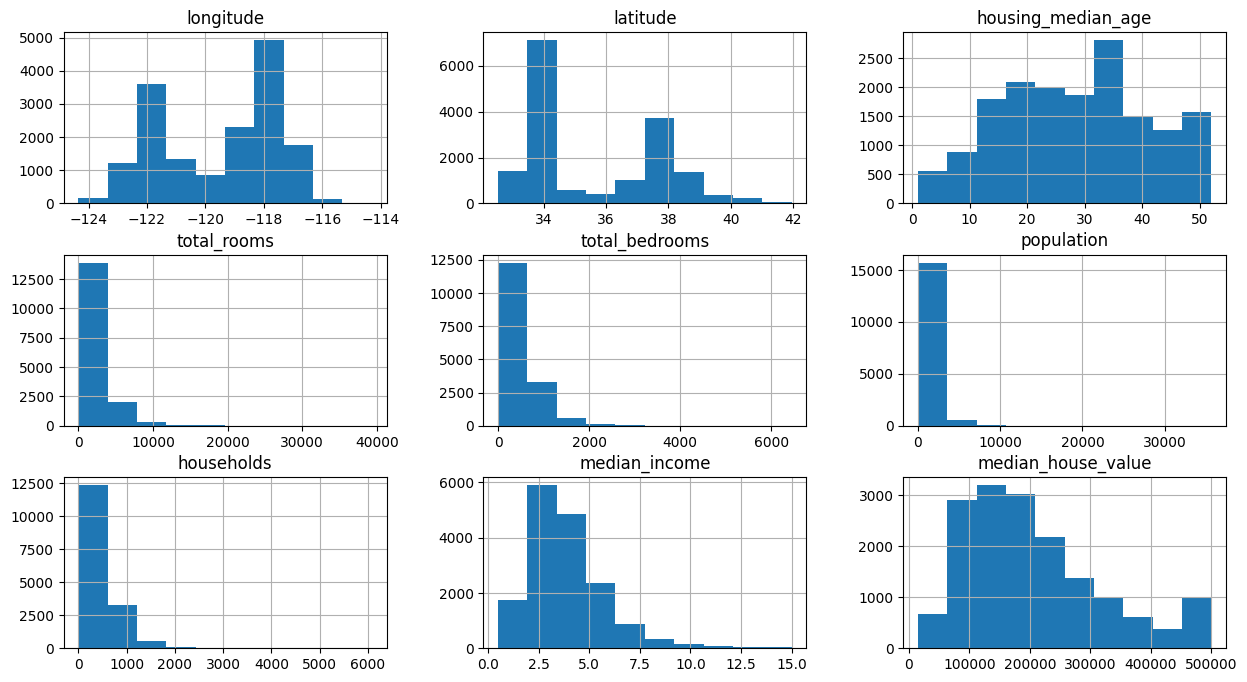

In [153]:
train_data.hist(figsize=(15,8))

<Axes: >

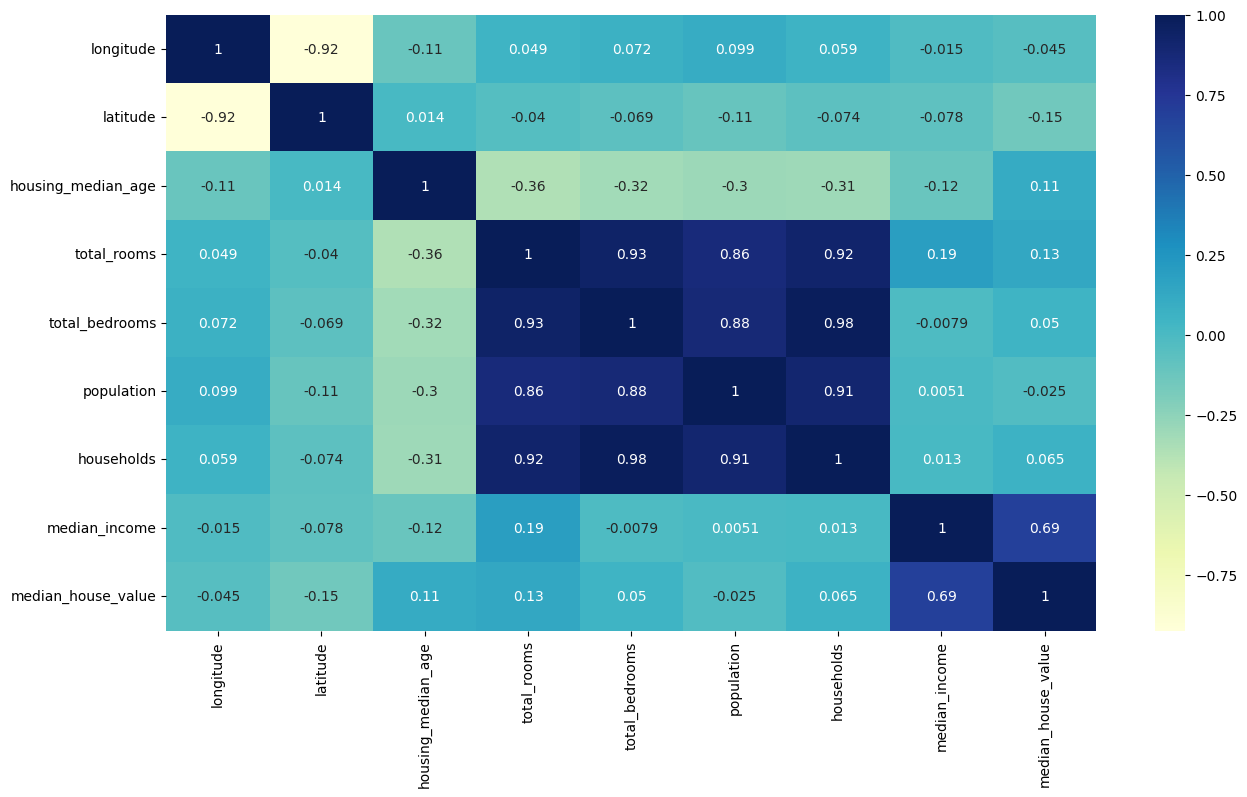

In [154]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap="YlGnBu")


In [155]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

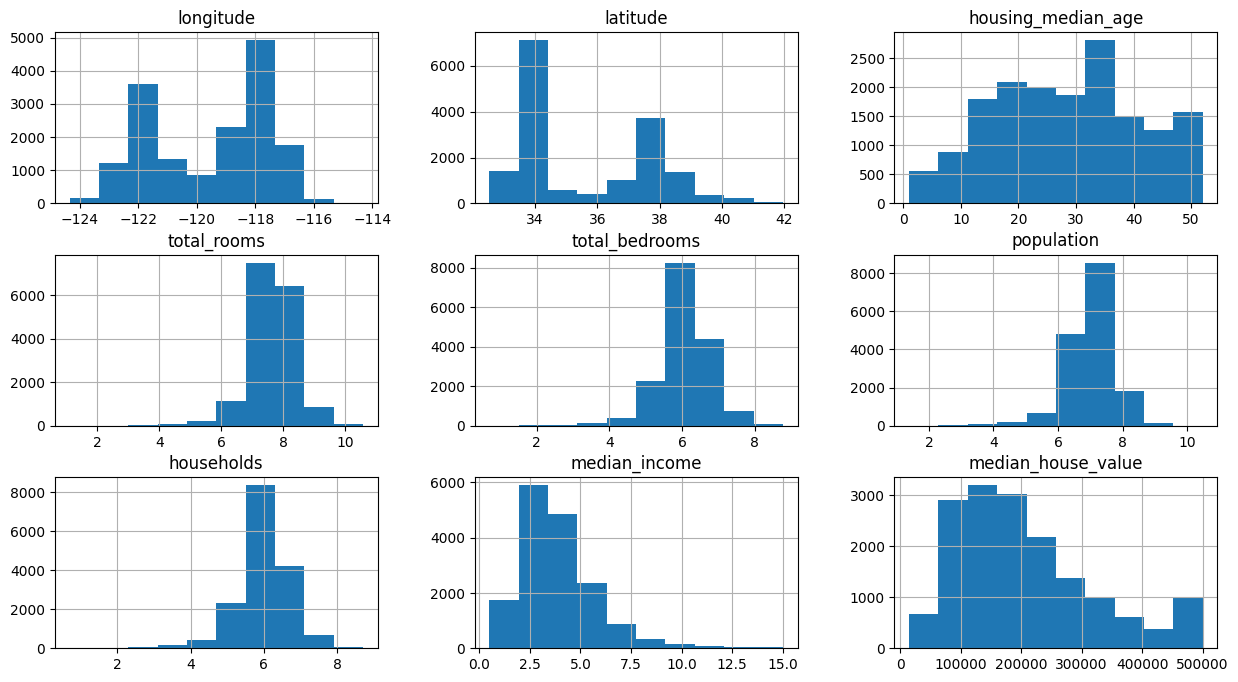

In [156]:
train_data.hist(figsize=(15,8))

In [157]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19943,-119.36,36.22,10.0,7.802209,6.267201,7.141245,6.167516,1.9355,INLAND,68300.0,False,True,False,False,False
5124,-118.26,33.99,30.0,7.440147,6.095825,7.584265,6.093570,1.5521,<1H OCEAN,97500.0,True,False,False,False,False
8244,-118.18,33.78,52.0,7.074117,5.945421,6.953684,5.808142,1.5603,NEAR OCEAN,162500.0,False,False,False,False,True
18416,-121.83,37.27,8.0,8.401782,6.965080,7.861727,6.935370,4.5615,<1H OCEAN,282600.0,True,False,False,False,False
17188,-122.33,37.39,52.0,6.352629,4.634729,5.451038,4.532599,6.2263,NEAR OCEAN,500001.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,-122.63,38.94,25.0,6.495266,4.976734,5.262690,4.543295,1.7566,INLAND,49000.0,False,True,False,False,False
13153,-121.60,36.88,21.0,8.136518,6.437752,7.529943,6.390241,4.7813,<1H OCEAN,241500.0,True,False,False,False,False
15259,-117.27,33.03,25.0,7.488853,5.743003,7.011214,5.743003,3.9826,NEAR OCEAN,215800.0,False,False,False,False,True
17160,-122.20,37.40,30.0,7.868254,5.826000,6.888572,5.783825,10.0481,NEAR OCEAN,500001.0,False,False,False,False,True


In [158]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [159]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19943,-119.36,36.22,10.0,7.802209,6.267201,7.141245,6.167516,1.9355,68300.0,False,True,False,False,False
5124,-118.26,33.99,30.0,7.440147,6.095825,7.584265,6.093570,1.5521,97500.0,True,False,False,False,False
8244,-118.18,33.78,52.0,7.074117,5.945421,6.953684,5.808142,1.5603,162500.0,False,False,False,False,True
18416,-121.83,37.27,8.0,8.401782,6.965080,7.861727,6.935370,4.5615,282600.0,True,False,False,False,False
17188,-122.33,37.39,52.0,6.352629,4.634729,5.451038,4.532599,6.2263,500001.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,-122.63,38.94,25.0,6.495266,4.976734,5.262690,4.543295,1.7566,49000.0,False,True,False,False,False
13153,-121.60,36.88,21.0,8.136518,6.437752,7.529943,6.390241,4.7813,241500.0,True,False,False,False,False
15259,-117.27,33.03,25.0,7.488853,5.743003,7.011214,5.743003,3.9826,215800.0,False,False,False,False,True
17160,-122.20,37.40,30.0,7.868254,5.826000,6.888572,5.783825,10.0481,500001.0,False,False,False,False,True


<Axes: >

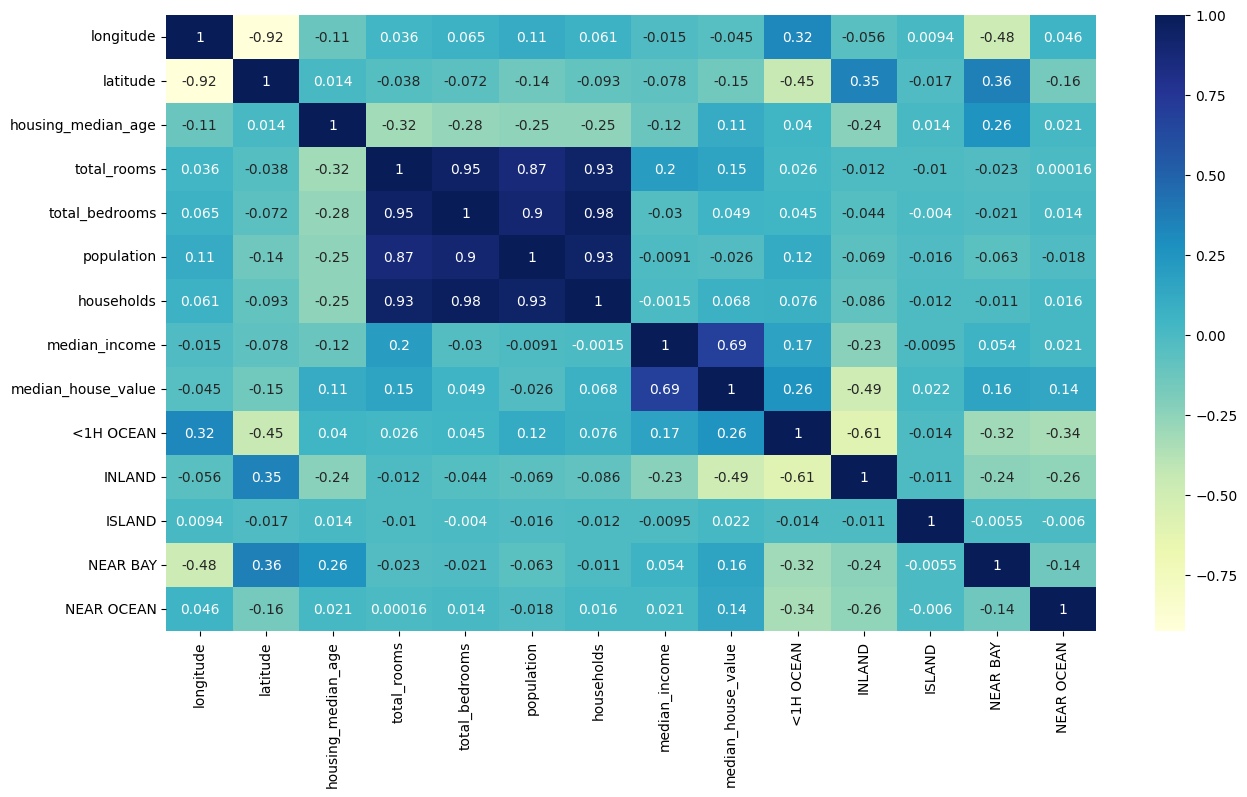

In [160]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap="YlGnBu")


<Axes: xlabel='latitude', ylabel='longitude'>

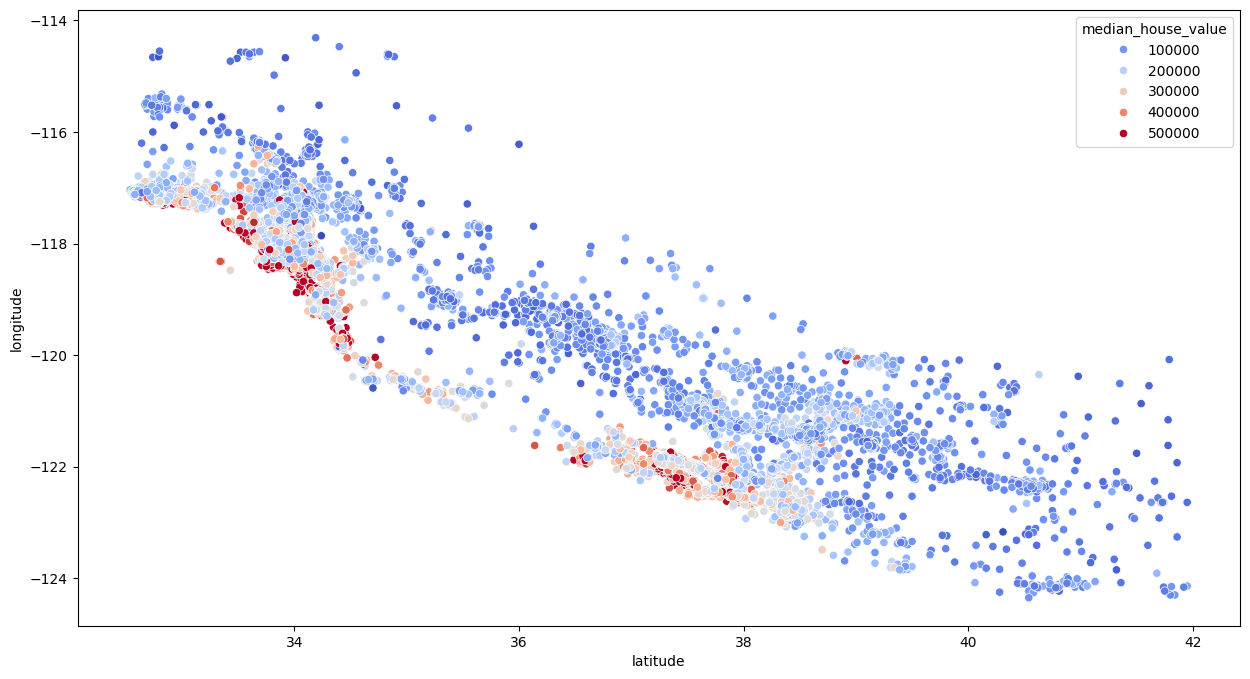

In [161]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [162]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

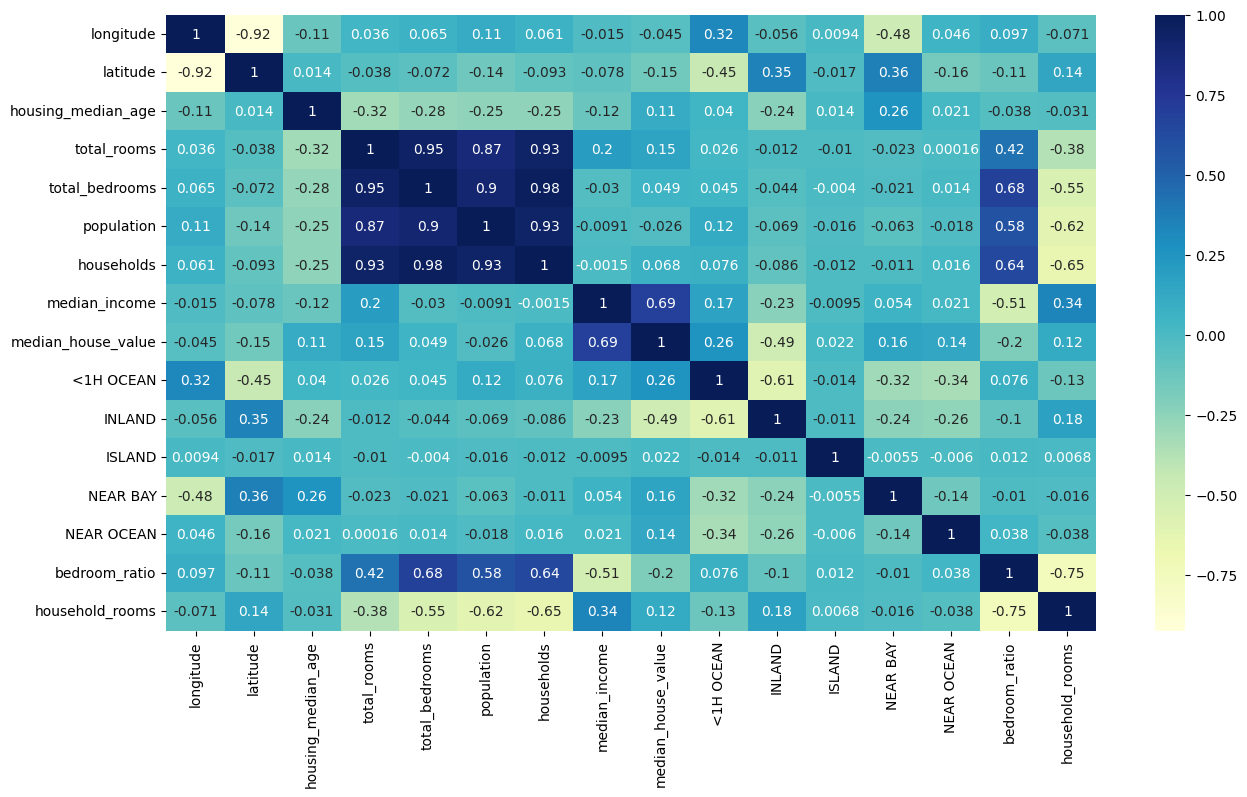

In [163]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap="YlGnBu")


In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train, y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s=scaler.fit_transform(x_train)

reg=LinearRegression()

reg.fit(x_train_s,y_train)

LinearRegression()

In [165]:
test_data=x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [166]:
x_test, y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [167]:
x_test_s= scaler.transform(x_test)

In [168]:
reg.score(x_test_s,y_test)

0.6704973435675224

In [172]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [173]:
forest.score(x_test_s,y_test)

0.8192827419813895

In [175]:
from sklearn.model_selection import GridSearchCV

param_grid={
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]
}
grid_search=GridSearchCV(forest,param_grid,cv=5,
                         scoring="neg_mean_squared_error",
                         return_train_score=True)

grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [176]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200)

In [177]:
grid_search.best_estimator_.score(x_test_s,y_test)

0.8206781089204314